### KRUNAL PANCHAL (student/data analyst)

# <center>Indian Restaurant Probe</center>
Web-Scraping, Foursquare API, Folium
Map & Machine Learning

### Introduction

In this project, we will proceed with the step by step analysis of the
neighbourhoods of Toronto in order to find insights for the best
suitable place to open an Indian Restaurant. Toronto shelter a greater
number of Indians than any other city in Canada, so it is a good idea to
start the restaurant here, but we just need to make sure whether it is a
profitable idea or not. If so, where we can place it, so it yields more
profit to the owner

### Downloading and Exploring Dataset

In [1]:
import numpy as np 
import pandas as pd  
import codecs
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
page = urlopen(r'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
bsobj = BeautifulSoup(page, 'lxml')

In [4]:
table = bsobj.table

In [5]:
table_contents=[]
table=bsobj.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [6]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [7]:
df = df[df['Borough'] != "Not assigned"].reset_index(drop=True)

In [8]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [11]:
df = df.groupby(['Borough', 'PostalCode'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
df.head()

,Borough,PostalCode,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [12]:
df['Borough'].value_counts()

North York                24
Downtown Toronto          17
Scarborough               17
Etobicoke                 11
Central Toronto            9
West Toronto               6
York                       5
East Toronto               4
East York                  4
Queen's Park               1
East York/East Toronto     1
Downtown Toronto Stn A     1
Mississauga                1
Etobicoke Northwest        1
East Toronto Business      1
Name: Borough, dtype: int64

In [13]:
df['Neighborhood'].value_counts()

Forest Hill North & West                  1
University of Toronto, Harbord            1
St. James Town, Cabbagetown               1
Downsview Central                         1
Rouge Hill, Port Union, Highland Creek    1
                                         ..
Caledonia-Fairbanks                       1
Malvern, Rouge                            1
Garden District, Ryerson                  1
Regent Park, Harbourfront                 1
Rosedale                                  1
Name: Neighborhood, Length: 103, dtype: int64

#### we can see , there are 0 not assigned values. So there is not need to replace the data.

In [14]:
df_coordinates = pd.read_csv('Geospatial_Coordinates.csv')

In [15]:
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
df_coordinates.rename(columns={'Postal Code':'PostalCode'}, inplace=True)

In [17]:
df_data = pd.merge(df, df_coordinates, on='PostalCode')

In [18]:
df_data.head()

,Borough,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


### Explore Neighborhoods in Toronto

In [19]:
CLIENT_ID = 'F3UR4QMHXX30GW3PRMQVUZ2YVUTZHN2XENW2M41TZEJRVSB2' # your Foursquare ID
CLIENT_SECRET = 'N2IJN4U3WBEP0W1K2UIGRCG1ZNOKAO5M1IDNPA0ACBPOEV1U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F3UR4QMHXX30GW3PRMQVUZ2YVUTZHN2XENW2M41TZEJRVSB2
CLIENT_SECRET:N2IJN4U3WBEP0W1K2UIGRCG1ZNOKAO5M1IDNPA0ACBPOEV1U


In [22]:
radius=1000
latitude = 43.628841
longitude = -79.520999
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()


In [23]:
results

{'meta': {'code': 200, 'requestId': '60c77702cc8f687389cd10af'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Islington - City Centre West',
  'headerFullLocation': 'Islington - City Centre West, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 57,
  'suggestedBounds': {'ne': {'lat': 43.63784100900001,
    'lng': -79.50858825227034},
   'sw': {'lat': 43.61984099099999, 'lng': -79.53340974772966}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc9f9b6b6c49c7469688f91',
       'name': 'South St. Burger',
       'location': {'address': '1020 Islington Ave',
        'lat': 43.63131374571208,
        'lng': -79.51840794740386,
        'labeledLatLngs': [{

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
import json 
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

In [25]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-25-0a6ee96164a4>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,South St. Burger,Burger Joint,43.631314,-79.518408
1,Wingporium,Wings Joint,43.630275,-79.518169
2,Moksha Yoga Etobicoke,Yoga Studio,43.622672,-79.519478
3,Power Yoga Canada Etobicoke,Yoga Studio,43.636592,-79.520312
4,Fat Bastard Burrito Co.,Burrito Place,43.622099,-79.521880


In [26]:
latitude = 43.628841
longitude = -79.520999


# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data['Latitude'], df_data['Longitude'], df_data['Borough'], df_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [27]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
First Canadian Place, Underground city
Christie
Enclave of M5E
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Enclave of M4L
Parkview Hill, Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
The Danforth  East
New Toronto, Mimico South, Humber 

In [28]:
print(toronto_venues.shape)
toronto_venues.head()

(2007, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,HYC Design Inc.,43.726793,-79.391681,Business Service
1,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop


In [29]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",5,5,5,5,5,5
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
...,...,...,...,...,...,...
Willowdale West,6,6,6,6,6,6
"Willowdale, Newtonbrook",1,1,1,1,1,1
Woburn,4,4,4,4,4,4


In [30]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 256 uniques categories.


There are 256 unique categories in which Indian Restaurant is one of them. We will do one hot encoding for getting dummies of venue category. So that we will calculate mean of all venue groupby there neighborhoods.

### Analyze each neighbourhood for Indian Restaurant

In [31]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop                  203
Café                          94
Sandwich Place                85
Pizza Place                   50
Restaurant                    49
                            ... 
Cajun / Creole Restaurant      1
Accessories Store              1
Sculpture Garden               1
Truck Stop                     1
Nail Salon                     1
Name: Venue Category, Length: 256, dtype: int64


In [33]:
toronto_part = toronto_grouped[['Neighborhood', 'Indian Restaurant']]
toronto_part

,Neighborhood,Indian Restaurant
0,Agincourt,0.00
1,"Alderwood, Long Branch",0.00
2,"Bathurst Manor, Wilson Heights, Downsview North",0.00
3,Bayview Village,0.00
4,"Bedford Park, Lawrence Manor East",0.04
...,...,...
94,Willowdale West,0.00
95,"Willowdale, Newtonbrook",0.00
96,Woburn,0.25
97,Woodbine Heights,0.00


In [34]:
toronto_merged = pd.merge(df_data, toronto_part, on='Neighborhood')
toronto_merged

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Indian Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.00
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.00
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,0.00
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.04
4,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.00
...,...,...,...,...,...,...
94,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,0.00
95,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,0.00
96,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,0.00
97,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262,0.00


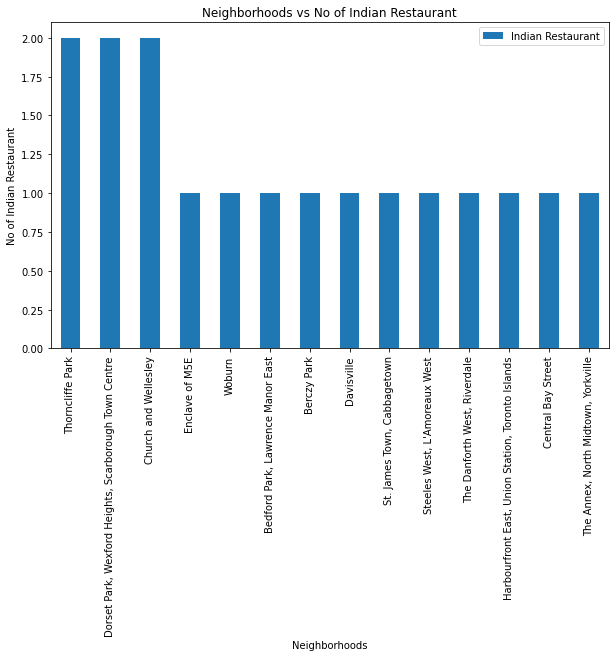

In [35]:
import matplotlib.pyplot as plt
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Indian Restaurant'].sum())
graph = graph.sort_values(by ='Indian Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Indian Restaurant")
plt.title("Neighborhoods vs No of Indian Restaurant")
plt.show()

### 

### Cluster Neighborhoods 

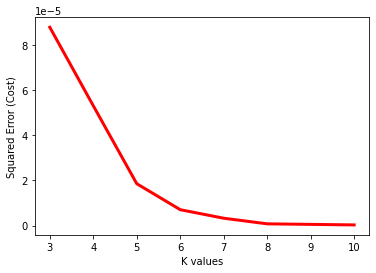

In [36]:
toronto_part_clustering = toronto_part.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [37]:
from yellowbrick.cluster import KElbowVisualizer

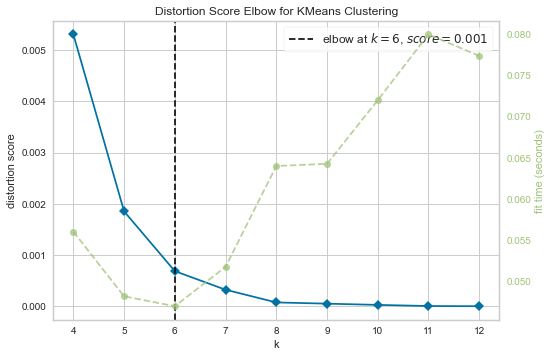

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(toronto_part_clustering)       
visualizer.show()  

Using elbow method , we can see that K=6 is the best value

In [39]:
kclusters = 6
toronto_part_clustering = toronto_part.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)
kmeans.labels_

array([1, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 4, 1, 1, 5, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1])

In [47]:
toronto_part.head()

,Cluster Labels,Neighborhood,Indian Restaurant
0,1,Agincourt,0.00
1,1,"Alderwood, Long Branch",0.00
2,1,"Bathurst Manor, Wilson Heights, Downsview North",0.00
3,1,Bayview Village,0.00
4,4,"Bedford Park, Lawrence Manor East",0.04


In [49]:
toronto_merged = df_data
toronto_merged = toronto_merged.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,1.0,0.00
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,1.0,0.00
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,1.0,0.00
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,4.0,0.04
4,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,1.0,0.00


In [50]:
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Examine Clusters

#### We have total of 6 clusters such as 0,1,2,3,4,5. 

Cluster 0

In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
34,East York,M4H,Thorncliffe Park,43.705369,-79.349372,0.0,0.1


Cluster 1 

In [52]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,1.0,0.0
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,1.0,0.0
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,1.0,0.0
4,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,1.0,0.0
5,Central Toronto,M5N,Roselawn,43.711695,-79.416936,1.0,0.0
...,...,...,...,...,...,...,...
94,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,1.0,0.0
95,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,1.0,0.0
96,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,1.0,0.0
97,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262,1.0,0.0


Cluster 2

In [53]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
82,Scarborough,M1P,"Dorset Park, Wexford Heights, Scarborough Town...",43.75741,-79.273304,2.0,0.333333


cluster 3

In [54]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
75,Scarborough,M1G,Woburn,43.770992,-79.216917,3.0,0.25


Cluster 4

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,4.0,0.040000
7,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,4.0,0.055556
65,North York,M5M,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,4.0,0.040000
87,Scarborough,M1W,"Steeles West, L'Amoreaux West",43.799525,-79.318389,4.0,0.062500


Cluster 5

In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
9,Downtown Toronto,M4X,"St. James Town, Cabbagetown",43.667967,-79.367675,5.0,0.026316
10,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,5.0,0.028986
14,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,5.0,0.021739
15,Downtown Toronto,M5G,Central Bay Street,43.657952,-79.387383,5.0,0.016667
25,Downtown Toronto Stn A,M5W,Enclave of M5E,43.646435,-79.374846,5.0,0.011765
27,East Toronto,M4K,"The Danforth West, Riverdale",43.679557,-79.352188,5.0,0.023810


### Results 

After complete analysis of neighborhood of Toronto for the opening of Indian Restaurants as a part business problem using various data and applying algorithms to find the best suitable place or neighbourhood for restaurant , following are the results :

1. from the above plot , we can see out of all the neighborhoods only Thorncliffe Park , Dorset Park , Wexford Heights , Scarborough , Church and Wellesley has the highest number of Indian Restaurants with higher population density.

2. after observing the data, opening an restaurant in Scarborough would be appropriate place as seen from the above clusters.

### Conclusion

To conclude this project , the insights for the given business problem was concluded. Many python libraries were used to fetch , manipulate the contents and to analyze and visualize the datasets. The Foursquare Api helps to get the venues in neighbourhoods of Toronto . Machine learning Algorithms and techniques was used to predict the output of given data and for visualising folium library is used. A data scientist can use similar procedure to predict some different outputs like opening of malls in nearby areas. Similarly, we can analyze the data for different purpose such as opening of cuisine or gym. Finally, this project was completed as a real - life problem with uselful outputs with challlenges using data science.